<a href="https://colab.research.google.com/github/Mahesh27-coder/AR-Campus-guide/blob/main/HousePredictionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [68]:
my1=pd.read_csv("Bengaluru_House_Data.csv")

In [69]:
my1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [70]:
my1.shape

(13320, 9)

In [71]:
X=my1.iloc[:,[2,3,5,6,8]]

In [72]:
X.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [73]:
X=X.dropna()

In [74]:
X.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [75]:
X.shape

(13246, 5)

In [76]:
X

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [77]:
def add(t):
  return int(t.split(" ")[0])


In [78]:
X["size"]

,size
0,2 BHK
1,4 Bedroom
2,3 BHK
3,3 BHK
4,2 BHK
...,...
13315,5 Bedroom
13316,4 BHK
13317,2 BHK
13318,4 BHK


In [79]:
X["BHK"]=X["size"].apply(add)

In [80]:
print(X)

                       location       size total_sqft  bath   price  BHK
0      Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1              Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2                   Uttarahalli      3 BHK       1440   2.0   62.00    3
3            Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                      Kothanur      2 BHK       1200   2.0   51.00    2
...                         ...        ...        ...   ...     ...  ...
13315                Whitefield  5 Bedroom       3453   4.0  231.00    5
13316             Richards Town      4 BHK       3600   5.0  400.00    4
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0   60.00    2
13318           Padmanabhanagar      4 BHK       4689   4.0  488.00    4
13319              Doddathoguru      1 BHK        550   1.0   17.00    1

[13246 rows x 6 columns]


In [81]:
X["BHK"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [82]:
X["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [83]:
def convertor(A):
  tokens=A.split("-")
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(A)
  except:
    return None

In [84]:
my2=X.copy()

In [85]:
print(convertor("12"))

12.0


In [86]:
l="21-12"
print(l.split("-"))

['21', '12']


In [87]:
print(convertor("21-12"))

16.5


In [88]:
my2["total_sqft"]=my2["total_sqft"].apply(convertor)

In [89]:
my2.head(31)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [90]:
my2["price_per_sqft"]=my2["price"]*100000/my2["total_sqft"]

In [91]:
my2

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [92]:
len(my2["location"].unique())

1304

In [93]:
my2["location"]=my2["location"].apply(lambda x:x.strip())

In [94]:
len(my2["location"].unique())

1293

In [95]:
loc=my2.groupby("location")["location"].agg("count").sort_values(ascending=False)

In [96]:
len(loc[loc>=10])

254

In [97]:
loc_great=loc[loc>=10]

In [98]:
def great(x):
  if x in loc_great:
    return x
  else:
    return "others"

In [99]:
my2["location"]=my2["location"].apply(great)

In [100]:
len(my2["location"].unique())

255

In [101]:
my2

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [102]:
my2=my2[~(my2["total_sqft"]/my2["BHK"]<300)]

In [103]:
my2.shape

(12502, 7)

In [104]:
my2.price_per_sqft.describe()

,price_per_sqft
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [105]:
def re(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    df1=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<(m+st))]
    df_out=pd.concat([df_out,df1],ignore_index=True)
  return df_out

In [106]:
my2=re(my2)

In [107]:
my2

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10217,others,2 BHK,1353.0,2.0,110.00,2,8130.081301
10218,others,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10219,others,3 BHK,1440.0,2.0,63.93,3,4439.583333
10220,others,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [108]:
my2.shape

(10222, 7)

In [109]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])

    for location, location_df in df.groupby('location'):
        bhk_stats = {}


        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }


        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:

                condition = bhk_df.price_per_sqft < stats['mean']
                outlier_indices = bhk_df[condition].index.values
                exclude_indices = np.append(exclude_indices, outlier_indices)


    return df.drop(exclude_indices, axis='index')


In [110]:
my2=remove_bhk_outliers(my2)

In [111]:
my2.shape

(7369, 7)

In [112]:
my2

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10213,others,2 BHK,1200.0,2.0,70.0,2,5833.333333
10214,others,1 BHK,1800.0,1.0,200.0,1,11111.111111
10217,others,2 BHK,1353.0,2.0,110.0,2,8130.081301
10218,others,1 Bedroom,812.0,1.0,26.0,1,3201.970443


Text(0, 0.5, 'count')

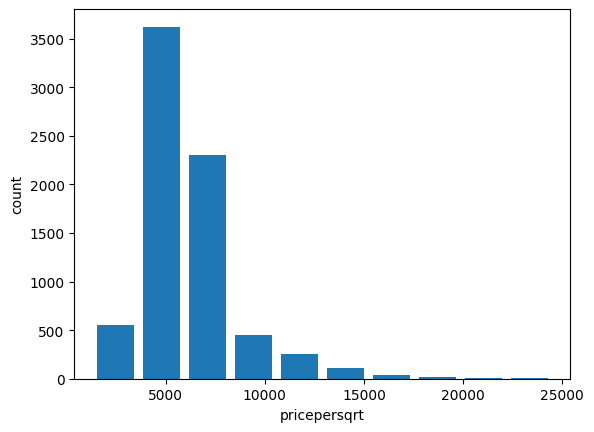

In [113]:
plt.hist(my2.price_per_sqft,rwidth=0.8)
plt.xlabel("pricepersqrt")
plt.ylabel("count")

In [114]:
my2 = my2[(my2.bath < my2.BHK + 2)]

In [115]:
my2.shape

(7291, 7)

In [116]:
my2=my2.drop(["size","price_per_sqft"], axis=1)

In [117]:
my2.head(10)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
7,1st Block Koramangala,1415.0,2.0,110.0,2
8,1st Block Koramangala,860.0,2.0,65.5,2
9,1st Block Koramangala,3000.0,3.0,300.0,4


In [118]:
y=my2.iloc[:,-2]

In [119]:
X=my2.iloc[:,[0,1,2,4]]

In [120]:
y

,price
0,428.0
1,194.0
2,235.0
3,130.0
4,148.0
...,...
10213,70.0
10214,200.0
10217,110.0
10218,26.0


In [121]:
X

,location,total_sqft,bath,BHK
0,1st Block Jayanagar,2850.0,4.0,4
1,1st Block Jayanagar,1630.0,3.0,3
2,1st Block Jayanagar,1875.0,2.0,3
3,1st Block Jayanagar,1200.0,2.0,3
4,1st Block Jayanagar,1235.0,2.0,2
...,...,...,...,...
10213,others,1200.0,2.0,2
10214,others,1800.0,1.0,1
10217,others,1353.0,2.0,2
10218,others,812.0,1.0,1


In [122]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[("encoders",OneHotEncoder(),[0])],remainder="passthrough")
X=(ct.fit_transform(X))

In [123]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 29164 stored elements and shape (7291, 258)>

In [124]:
y

,price
0,428.0
1,194.0
2,235.0
3,130.0
4,148.0
...,...
10213,70.0
10214,200.0
10217,110.0
10218,26.0


In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [127]:
r2 = r2_score(y_test, y_pred)


In [128]:
r2

0.8337465097929624

In [150]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
r2_rf = r2_score(y_test, rf_pred)
r2_rf

0.8756337473563158

In [142]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
print( r2_score(y_test, xgb_preds))

0.865058703484906


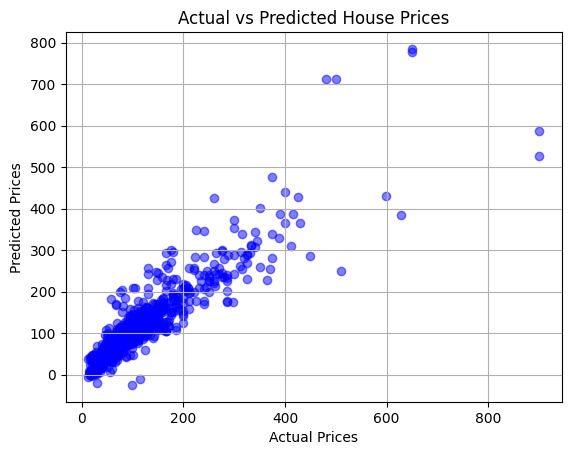

In [147]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.savefig("actual_vs_predicted.png")
plt.show()


In [140]:
new_data = pd.DataFrame([{
    'location': 'Akshaya Nagar',
    'total_sqft': 1000,
    'bath': 2,
    'balcony': 2,
    'BHK': 2
}])

new_data_transformed = ct.transform(new_data)

predicted_price = rf_model.predict(new_data_transformed)[0]

# Output already in lakhs
print(f"Predicted Price: {predicted_price:,.2f} lakhs")


Predicted Price: 49.37 lakhs


In [131]:
import joblib
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(ct, "column_transformer.pkl")


['column_transformer.pkl']

In [132]:
from google.colab import files

files.download('rf_model.pkl')
files.download('column_transformer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>